In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import h5py 
import scipy 
from PIL import Image 
from scipy import ndimage


In [5]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [6]:
train_x,train_y,test_x,test_y,classes=load_dataset()

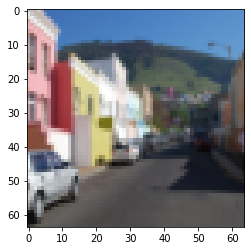

In [7]:
plt.imshow(train_x[1])

In [8]:
m_train=train_x.shape[0]
m_test=test_x.shape[0]
num_px=train_x.shape[1]


In [9]:
train_x.shape

(209, 64, 64, 3)

In [10]:
train_x_flattern=train_x.reshape(train_x.shape[0],-1).T
test_x_flattern=test_x.reshape(test_x.shape[0],-1).T

In [11]:
 train_x_flattern.shape

(12288, 209)

In [12]:
train_set_x=train_x_flattern/255
test_set_x=test_x_flattern/255

In [13]:
train_set_x

array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
        0.03137255],
       [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
        0.10980392],
       [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
        0.20784314],
       ...,
       [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
        0.        ],
       [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
        0.        ],
       [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
        0.        ]])

In [14]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [15]:
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b       

In [29]:
def propogate(w,b,X,Y):
    m=X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b)
    cost=-1./m * np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw=1./m*np.dot(X,(A-Y).T)
    db=1./m*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads={'dw':dw,
           'db':db}
    return grads,cost

In [34]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propogate(w,b,X,Y)
        dw=grads['dw']
        db=grads['db']
        
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    params={'w':w,
           'b':b}
    grads={'dw':dw,
          'db':db}
    return params,grads,costs

In [35]:
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
      
    assert(Y_prediction.shape == (1, m)) 
    return Y_prediction

In [36]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w,b=initialize_with_zeros(X_train.shape[0])
    parameters,grads,costs= optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = print_cost)
    w=parameters['w']
    b=parameters['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [37]:
d = model(train_set_x, train_y, test_set_x, test_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

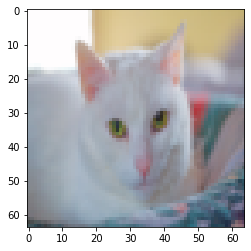

In [39]:
# Example of a picture that was wrongly classified.
index = 2
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

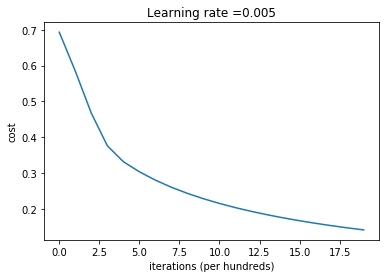

In [40]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



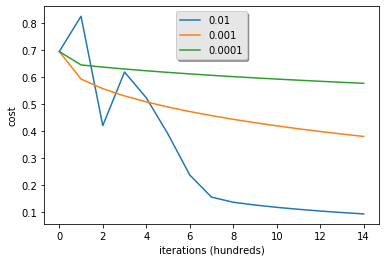

In [42]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_y, test_set_x, test_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [45]:
my_image = "cat_1.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))

AttributeError: module 'scipy.ndimage' has no attribute 'imread'